In [1]:
import mne
import numpy as np 
import time
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

def rename_chanals(data):
    mne.rename_channels(data.info, mapping=
    {'FP1':'Fp1',
     'FP2':'Fp2',
     'FZ':'Fz',
     'FCZ':'FCz',
     'CZ':'Cz',
     'CPZ':'CPz',
     'PZ':'Pz',
     'OZ':'Oz'})

# Problem 6

In [2]:
#load eeg data 
raw= mne.io.read_raw_eeglab('sXD_5678.set', preload = True)

<ipython-input-2-56f48cba7999>:2: RuntimeWarning: 1 channel names are too long, have been truncated to 15 characters:
['vehicle position']
  raw= mne.io.read_raw_eeglab('sXD_5678.set', preload = True)


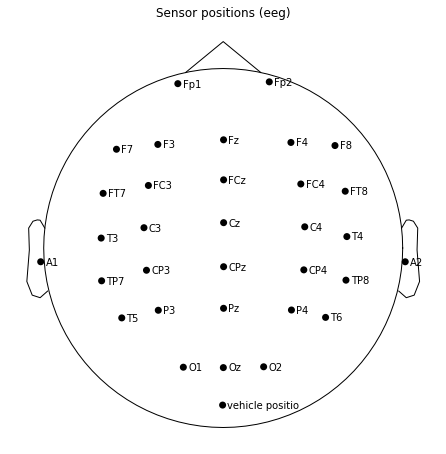

EEG channel type selected for re-referencing
Applying a custom EEG reference.


<RawEEGLAB | sXD_5678.set, 31 x 3157760 (6315.5 s), ~746.9 MB, data loaded>

In [3]:
#select location file 
ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
#ten_twenty_montage.plot(show_names=True)

#set up random location for channel vehicle positio
montage = mne.channels.make_dig_montage(ch_pos=dict(zip(['vehicle positio'], [[0,-0.3,1.95]])),
coord_frame='unknown')
ten_twenty_montage = ten_twenty_montage.__add__(montage)

#uniform the channel names
rename_chanals(raw)

#load location file 
raw.set_montage(ten_twenty_montage,on_missing='warn')
raw.plot_sensors(ch_type='eeg',show_names=True)

# re-reference data by (A1+A2)/2
mne.set_eeg_reference(raw, ref_channels=['A1','A2'] )
raw.drop_channels(['A1', 'A2'])

In [4]:
# resampling to 250 hz
raw.resample(250)

<RawEEGLAB | sXD_5678.set, 31 x 1578880 (6315.5 s), ~373.5 MB, data loaded>

In [5]:
#run ica and record elapsed time
ica= mne.preprocessing.ICA(n_components=len(raw.ch_names))
ica.fit(raw)

Fitting ICA to data using 31 channels (please be patient, this may take a while)
Selecting by number: 31 components
Fitting ICA took 108.9s.


<ICA | raw data decomposition, fit (fastica): 1578880 samples, 31 components, channels used: "eeg">

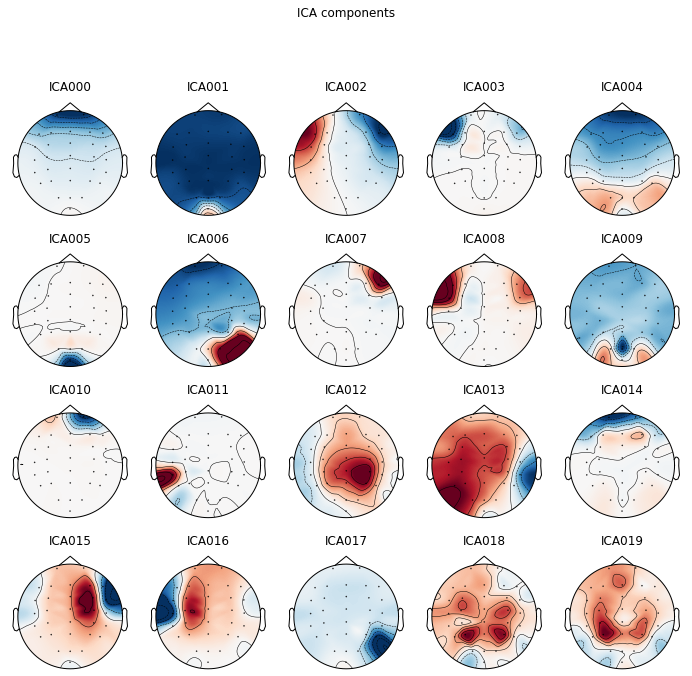

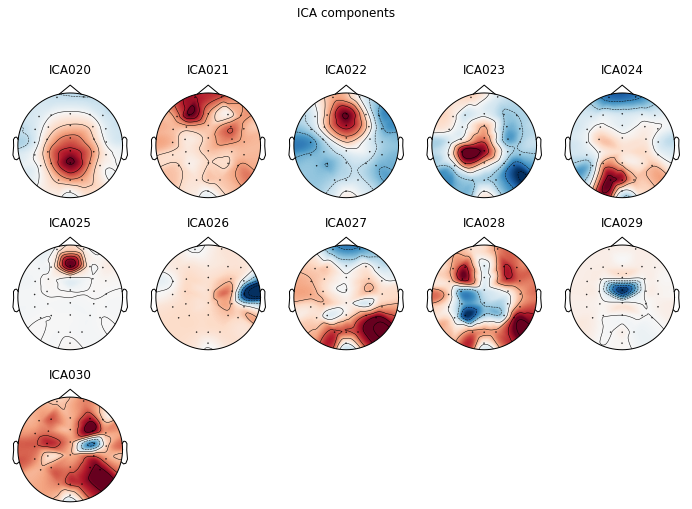

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x526.68 with 11 Axes>]

In [6]:
#plot ica components
ica.plot_components()


In [7]:
#indicate noise component 
ica.exclude= [0,1,2,3,5,8]
reconst_raw= raw.copy().crop(0, 10)
ica.apply(reconst_raw)


Applying ICA to Raw instance
    Transforming to ICA space (31 components)
    Zeroing out 6 ICA components
    Projecting back using 31 PCA components


<RawEEGLAB | sXD_5678.set, 31 x 2501 (10.0 s), ~654 kB, data loaded>

Before deleting noise components


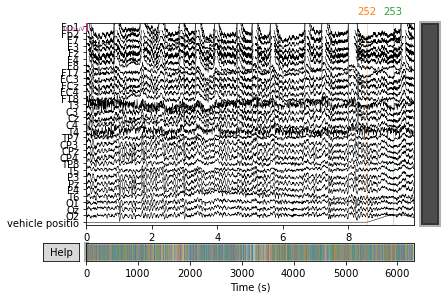

After deleting noise components


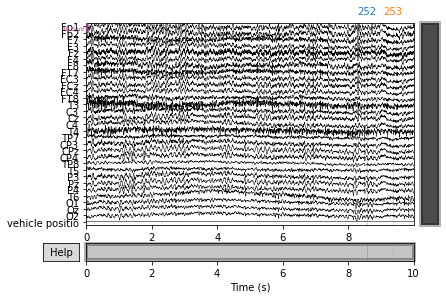

In [8]:
print('Before deleting noise components')
sig0 = raw.plot(duration=10.0, n_channels=len(raw.ch_names))
print('After deleting noise components')
sig1 = reconst_raw.plot(n_channels=len(reconst_raw.ch_names))

In [11]:
del raw, ica

# Problem 7

## Load data

In [2]:
raw = mne.io.read_raw_eeglab('sXD_5678.set')
raw.drop_channels(['vehicle positio'])

<ipython-input-2-10848eda5298>:1: RuntimeWarning: 1 channel names are too long, have been truncated to 15 characters:
['vehicle position']
  raw = mne.io.read_raw_eeglab('sXD_5678.set')
<ipython-input-2-10848eda5298>:1: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  raw = mne.io.read_raw_eeglab('sXD_5678.set')


<RawEEGLAB | sXD_5678.set, 32 x 3157760 (6315.5 s), ~771.0 MB, data loaded>

-----

## Plot channel location & re-reference

In [3]:
rename_chanals(raw)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

<RawEEGLAB | sXD_5678.set, 32 x 3157760 (6315.5 s), ~771.0 MB, data loaded>

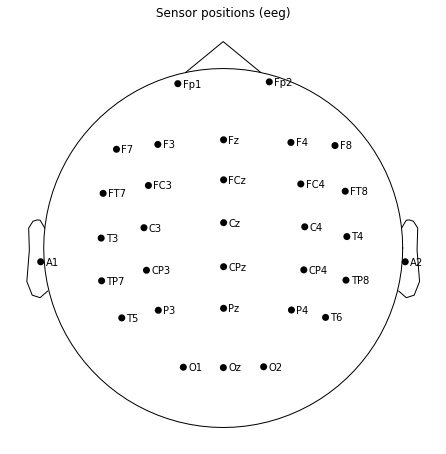

In [4]:
fig = raw.plot_sensors(ch_type='eeg',show_names=True)

In [5]:
mne.set_eeg_reference(raw, ref_channels=['A1','A2'] )
raw.drop_channels(['A1', 'A2'])

EEG channel type selected for re-referencing
Applying a custom EEG reference.


<RawEEGLAB | sXD_5678.set, 30 x 3157760 (6315.5 s), ~722.8 MB, data loaded>

----------------------------------

## Down sampling and filtering

In [6]:
raw.resample(250)
raw.filter(1, 50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 825 samples (3.300 sec)



<RawEEGLAB | sXD_5678.set, 30 x 1578880 (6315.5 s), ~361.4 MB, data loaded>

----

## Run ICA and plot ICA components

In [7]:
ica = mne.preprocessing.ICA(n_components=raw.info['nchan']) 
ica.fit(raw)

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by number: 30 components
Fitting ICA took 162.3s.


<ICA | raw data decomposition, fit (fastica): 1578880 samples, 30 components, channels used: "eeg">

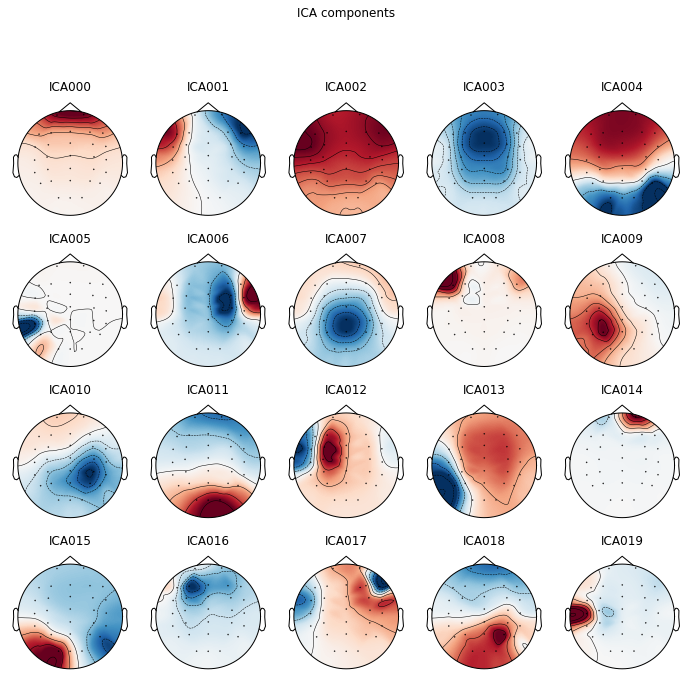

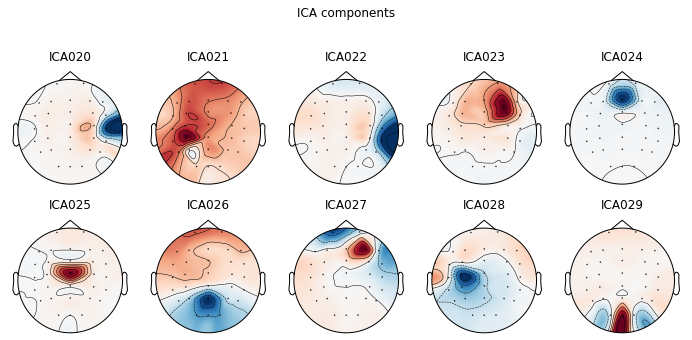

[<MNEFigure size 702x696.24 with 20 Axes>,
 <MNEFigure size 702x357.12 with 10 Axes>]

In [8]:
ica.plot_components()

----

## Identify noise components & delete artifact components

considering component spatial distribution and comparing signal before/after exclusion,
component[0] is very likely to be artifact from blinking. 

In [9]:
ica.exclude = [0,1,2,8]

reconst_raw = raw.copy()
ica.apply(reconst_raw)

Applying ICA to Raw instance
    Transforming to ICA space (30 components)
    Zeroing out 4 ICA components
    Projecting back using 30 PCA components


<RawEEGLAB | sXD_5678.set, 30 x 1578880 (6315.5 s), ~361.4 MB, data loaded>

----

## Plot first 10-second channel data

signal before deleting noise/artifact component


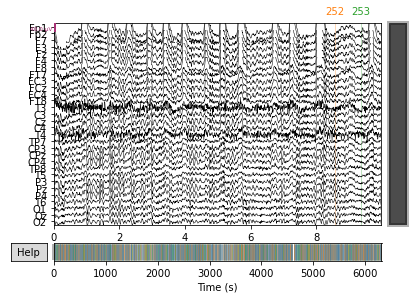

signal after deleting noise/artifact component


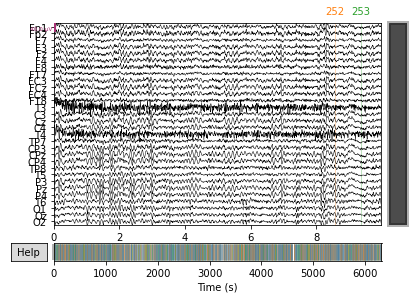

In [10]:
print('signal before deleting noise/artifact component')
sig2 = raw.plot(duration=10, n_channels=len(raw.ch_names))
print('signal after deleting noise/artifact component')
sig3 = reconst_raw.plot(duration=10, n_channels=len(reconst_raw.ch_names))

### Supplement

ica component numbers: nchan-1 from https://eeglab.org/tutorials/06_RejectArtifacts/RunICA.html#issues-with-data-rank-deficiencies


In [ ]:
#ica.plot_properties(raw, picks=[5,6,7])

# Problem 8

In [ ]:
#load eeg data 
raw = mne.io.read_raw_eeglab('sXD_5678.set', preload = True)

#remove unnessary channels 
raw.drop_channels(['vehicle positio'])

In [ ]:
# Correct montage data
rename_chanals(raw)
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

In [ ]:
# crop data for dev
# raw.crop(tmax=1000)

In [ ]:
# Set EEG reference
mne.set_eeg_reference(raw, ref_channels=['A1','A2'] )
raw.drop_channels(['A1','A2'])

In [ ]:
channal = raw.get_data()[10]
fft_ch = fft(channal)

N = channal.size
# sample spacing
T = 1.0 / 500
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
xf = fftfreq(N, T)[:N//2]
plt.plot(xf, 2.0/N * np.abs(fft_ch[0:N//2]))

In [ ]:
# notch filter at 60 frequency 
raw_notch = raw.copy().notch_filter(freqs=60, notch_widths=10)

In [ ]:
# custum filter
# Low-pass filter at 30 Hz – >100 Hz
# High-pass filter at 1 Hz – >0.3 Hz

raw_filtered = raw.copy().filter(
    l_freq = 1,
    h_freq = 30,
    l_trans_bandwidth = 0.7,
    h_trans_bandwidth = 70
)

In [ ]:
# Resample
raw_filtered.resample(250)

In [ ]:
# ICA 
ica = mne.preprocessing.ICA(n_components=raw_filtered.info['nchan']) 
ica.fit(raw_filtered)

In [ ]:
ica.plot_components()

In [ ]:
ica.exclude = [0,1,3,18,19]

reconst_raw = raw_filtered.copy()
ica.apply(reconst_raw)

In [ ]:
reconst_raw.plot(n_channels=len(reconst_raw.ch_names))